In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df_ibovespa = pd.read_csv('/content/df1.csv')

In [ ]:
df_ibovespa

,Data,Fechamento,Abertura,Maxima,Minima,Tendencia,Volume
0,2005-07-12,25.536,25.027,25.576,24.932,0,9.491000e+07
1,2005-07-13,25.856,25.557,26.043,25.557,0,1.072800e+08
2,2005-07-14,25.920,25.859,26.142,25.725,0,1.133500e+08
3,2005-07-15,25.222,25.916,25.916,25.222,1,7.288000e+07
4,2005-07-18,25.321,25.222,25.412,24.916,0,5.217000e+07
...,...,...,...,...,...,...,...
4948,2025-07-04,141.264,140.928,141.564,140.597,0,3.310000e+09
4949,2025-07-07,139.490,141.265,141.342,139.295,1,6.120000e+09
4950,2025-07-08,139.303,139.491,139.591,138.770,1,6.750000e+09
4951,2025-07-09,137.481,139.303,139.331,137.299,1,7.580000e+09


In [ ]:
#Transformando a coluna data em datetime e a colocando como indice
df_ibovespa['Data'] = pd.to_datetime(df_ibovespa['Data'], format='%Y-%m-%d')
df_ibovespa.set_index('Data', inplace=True)
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4953 entries, 2005-07-12 to 2025-07-10
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fechamento  4953 non-null   float64
 1   Abertura    4953 non-null   float64
 2   Maxima      4953 non-null   float64
 3   Minima      4953 non-null   float64
 4   Tendencia   4953 non-null   int64  
 5   Volume      4953 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 270.9 KB


## Normalizacao dos Dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_columns(df, columns):
  """
  Normalizes the specified columns of a DataFrame using Min-Max scaling.

  Args:
    df: pandas DataFrame.
    columns: List of column names to normalize.

  Returns:
    DataFrame with normalized columns.
  """
  scaler = MinMaxScaler()
  df[columns] = scaler.fit_transform(df[columns])
  return df

In [ ]:
#Normalizar as colunas Fechamento, abertura, maxima, minima e volume
df_ibovespa= normalize_columns(df_ibovespa, ['Fechamento', 'Abertura', 'Maxima', 'Minima', 'Volume'])
df_ibovespa.head()

,Fechamento,Abertura,Maxima,Minima,Tendencia,Volume
Data,,,,,,
2005-07-12,0.008609,0.004462,0.005803,0.005195,0,0.003816
2005-07-13,0.011351,0.009001,0.009806,0.010570,0,0.004314
2005-07-14,0.011899,0.011588,0.010654,0.012015,0,0.004558
2005-07-15,0.005919,0.012076,0.008717,0.007689,1,0.002930
2005-07-18,0.006768,0.006132,0.004397,0.005057,0,0.002098


## Identificando a sazonalidade das series

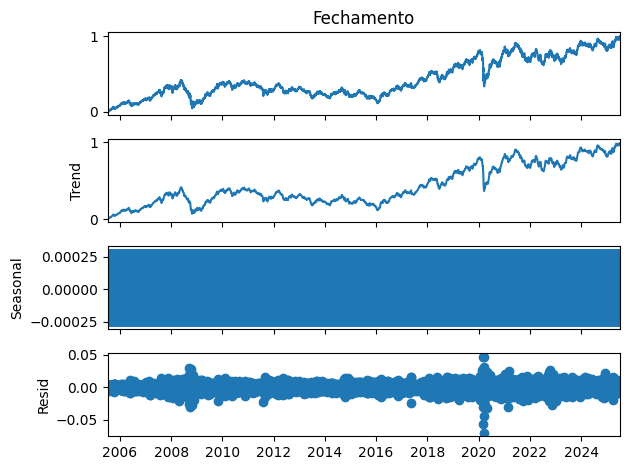

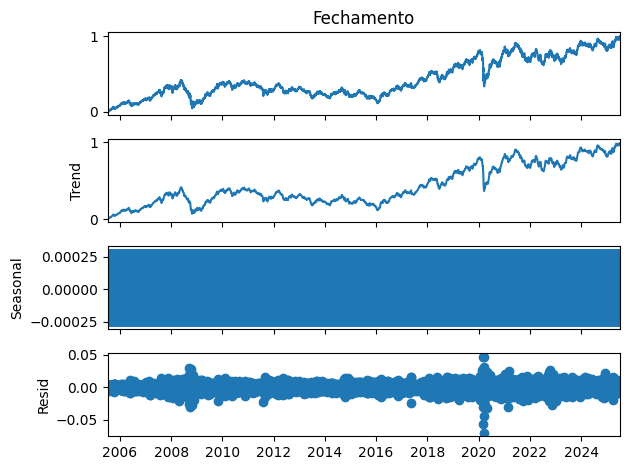

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_decompose = seasonal_decompose(df_ibovespa['Fechamento'], period=5)
df_decompose.plot()

#Verificando a estacionariedade da série

Results of Dickey-Fuller Test:
Test Statistic                   -1.062253
p-value                           0.729888
#Lags Used                        8.000000
Number of Observations Used    4944.000000
Critical Value (1%)              -3.431673
dtype: float64
Falha na rejeição da hipótese nula. Série não estacionária
Test Statistic                   -1.062253
p-value                           0.729888
#Lags Used                        8.000000
Number of Observations Used    4944.000000
Critical Value (1%)              -3.431673
Critical Value (5%)              -2.862125
dtype: float64
Falha na rejeição da hipótese nula. Série não estacionária
Test Statistic                   -1.062253
p-value                           0.729888
#Lags Used                        8.000000
Number of Observations Used    4944.000000
Critical Value (1%)              -3.431673
Critical Value (5%)              -2.862125
Critical Value (10%)             -2.567081
dtype: float64
Falha na rejeição da hipótese nu

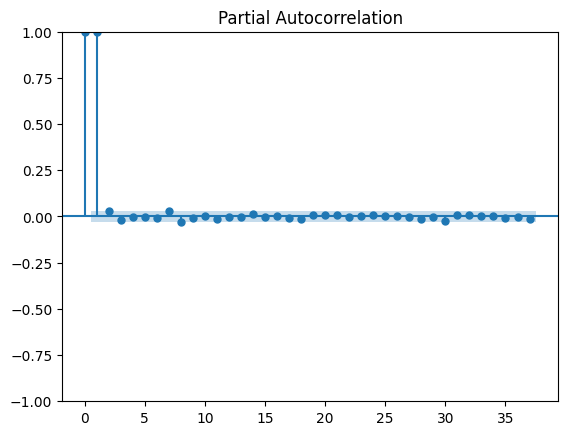

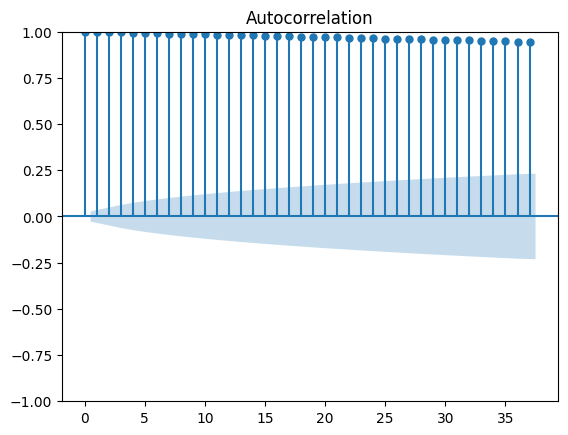

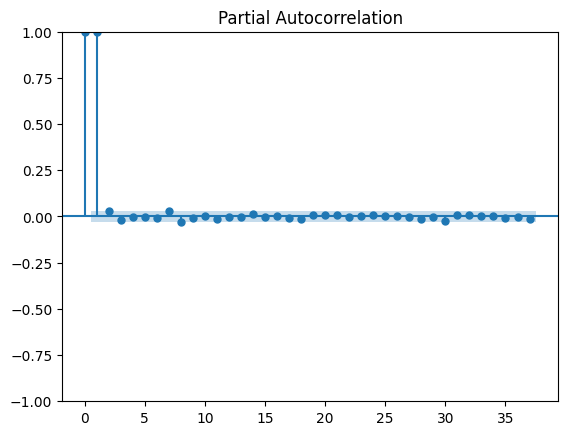

In [ ]:
#Fazendo um teste PACF e ADF
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def test_stationarity(timeseries):
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    if dftest[1] <= 0.05:
      print("Rejeição da hipótese nula. Série estacionária")
    else:
      print("Falha na rejeição da hipótese nula. Série não estacionária")


test_stationarity(df_ibovespa['Fechamento'])
plot_acf(df_ibovespa['Fechamento'])
plot_pacf(df_ibovespa['Fechamento'])

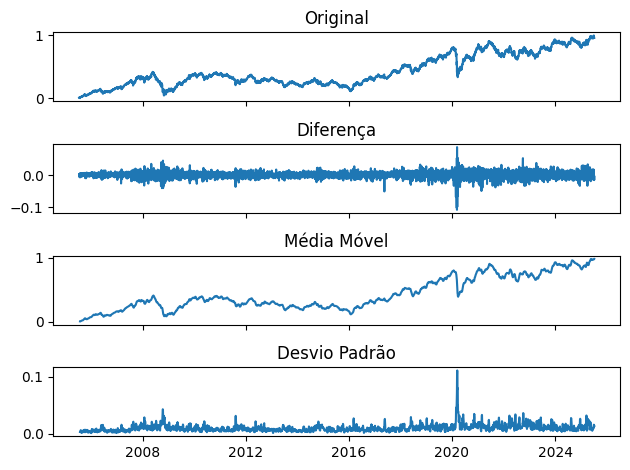

Results of Dickey-Fuller Test:
Test Statistic                  -23.842555
p-value                           0.000000
#Lags Used                        7.000000
Number of Observations Used    4944.000000
Critical Value (1%)              -3.431673
dtype: float64
Rejeição da hipótese nula. Série estacionária
Test Statistic                  -23.842555
p-value                           0.000000
#Lags Used                        7.000000
Number of Observations Used    4944.000000
Critical Value (1%)              -3.431673
Critical Value (5%)              -2.862125
dtype: float64
Rejeição da hipótese nula. Série estacionária
Test Statistic                  -23.842555
p-value                           0.000000
#Lags Used                        7.000000
Number of Observations Used    4944.000000
Critical Value (1%)              -3.431673
Critical Value (5%)              -2.862125
Critical Value (10%)             -2.567081
dtype: float64
Rejeição da hipótese nula. Série estacionária


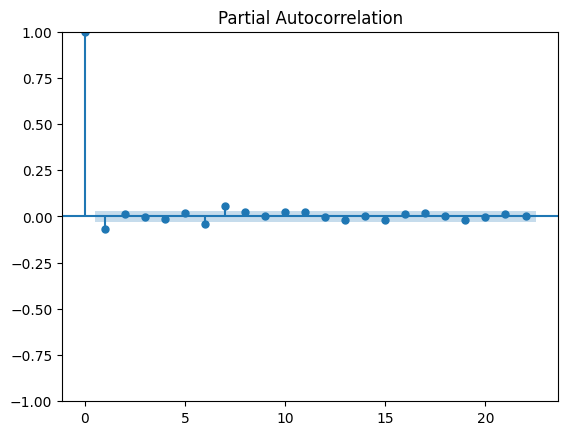

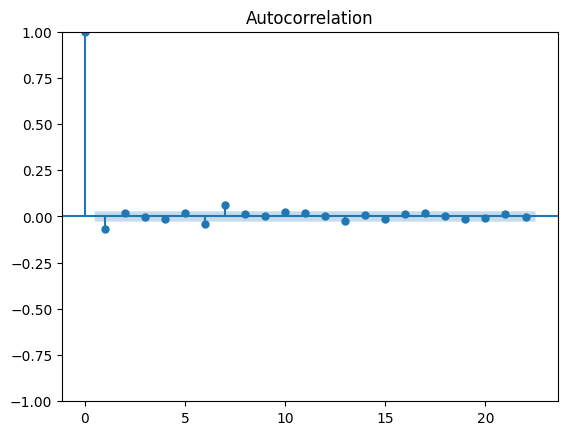

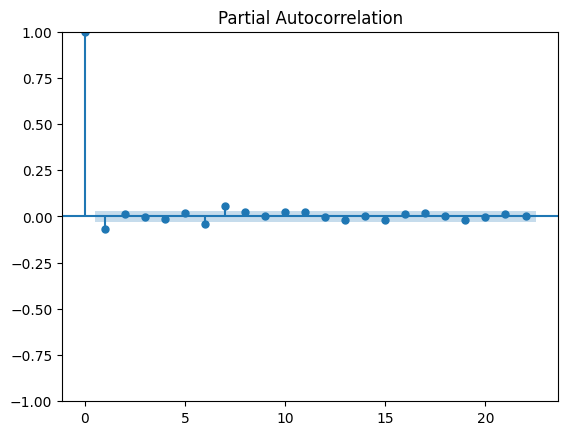

In [ ]:
#Transformacao da Serie em Estacionaria e Criacao de Metricas
df_diff = df_ibovespa['Fechamento'].diff(1)
df_ma = df_ibovespa['Fechamento'].rolling(window=10).mean()
df_sd = df_ibovespa['Fechamento'].rolling(window=10).std()
df_diff.dropna(inplace=True)
df_ma.dropna(inplace=True)
df_sd.dropna(inplace=True)
fig, axes = plt.subplots(4, 1, sharex=True)
axes[0].plot(df_ibovespa['Fechamento'])
axes[0].set_title('Original')
axes[1].plot(df_diff)
axes[1].set_title('Diferença')
axes[2].plot(df_ma)
axes[2].set_title('Média Móvel')
axes[3].plot(df_sd)
axes[3].set_title('Desvio Padrão')
plt.tight_layout()
plt.show()
test_stationarity(df_diff)
plot_acf(df_diff, lags=22)
plot_pacf(df_diff, lags=22)

#Separando o conjunto de Dados

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_ibovespa, test_size=0.2, shuffle=False)

#Utilizando modelos de Previsao de Series Temporais

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
# Bibliotecas básicas de data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Para machine learning
from sklearn.metrics import mean_squared_error

In [ ]:
# Prophet
from prophet import Prophet

In [ ]:
df_ibovespa.head()

,Fechamento,Abertura,Maxima,Minima,Tendencia,Volume
Data,,,,,,
2005-07-12,0.008609,0.004462,0.005803,0.005195,0,0.003816
2005-07-13,0.011351,0.009001,0.009806,0.010570,0,0.004314
2005-07-14,0.011899,0.011588,0.010654,0.012015,0,0.004558
2005-07-15,0.005919,0.012076,0.008717,0.007689,1,0.002930
2005-07-18,0.006768,0.006132,0.004397,0.005057,0,0.002098


In [ ]:
#reordenar as variaveis para evitar o dataleak
df_ibovespa = df_ibovespa[['Abertura', 'Maxima', 'Minima', 'Fechamento', 'Volume','Tendencia']]
df_ibovespa.head()

,Abertura,Maxima,Minima,Fechamento,Volume,Tendencia
Data,,,,,,
2005-07-12,0.004462,0.005803,0.005195,0.008609,0.003816,0
2005-07-13,0.009001,0.009806,0.010570,0.011351,0.004314,0
2005-07-14,0.011588,0.010654,0.012015,0.011899,0.004558,0
2005-07-15,0.012076,0.008717,0.007689,0.005919,0.002930,1
2005-07-18,0.006132,0.004397,0.005057,0.006768,0.002098,0


In [ ]:
df_ibovespa['Data'] = df_ibovespa.index
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4953 entries, 2005-07-12 to 2025-07-10
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Abertura    4953 non-null   float64       
 1   Maxima      4953 non-null   float64       
 2   Minima      4953 non-null   float64       
 3   Fechamento  4953 non-null   float64       
 4   Volume      4953 non-null   float64       
 5   Tendencia   4953 non-null   int64         
 6   Data        4953 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 309.6 KB


In [ ]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = df_ibovespa['Data']
df_prophet['y'] = df_ibovespa['Fechamento']
df_prophet

,ds,y
Data,,
2005-07-12,2005-07-12,0.008609
2005-07-13,2005-07-13,0.011351
2005-07-14,2005-07-14,0.011899
2005-07-15,2005-07-15,0.005919
2005-07-18,2005-07-18,0.006768
...,...,...
2025-07-04,2025-07-04,1.000000
2025-07-07,2025-07-07,0.984803
2025-07-08,2025-07-08,0.983201


In [ ]:
#Serparar o conjunto de treinto, validaçaõ e teste
data_de_corte = pd.to_datetime('2025-05-29')
treino = df_prophet.loc[df_prophet['ds'] < data_de_corte]
teste = df_prophet.loc[(df_prophet['ds'] >= data_de_corte) & (df_prophet['ds'] < data_de_corte + pd.Timedelta(days=30))]

In [ ]:
#Criando e treinando o modelo
modelo = Prophet(daily_seasonality=True)
modelo.fit(treino)
df_futuro = modelo.make_future_dataframe(periods=30, freq='D')
previsao = modelo.predict(df_futuro)
previsao.head()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s9x8k7_/qq3rej1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s9x8k7_/e18xj78w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94178', 'data', 'file=/tmp/tmp9s9x8k7_/qq3rej1k.json', 'init=/tmp/tmp9s9x8k7_/e18xj78w.json', 'output', 'file=/tmp/tmp9s9x8k7_/prophet_modelbvb2j88b/prophet_model-20250802222428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:24:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:24:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-07-12,0.010002,-0.062881,0.081387,0.010002,0.010002,-0.000745,-0.000745,-0.000745,0.006044,...,0.000290,0.000290,0.000290,-0.007079,-0.007079,-0.007079,0.0,0.0,0.0,0.009257
1,2005-07-13,0.010305,-0.056922,0.086197,0.010305,0.010305,0.000283,0.000283,0.000283,0.006044,...,0.000548,0.000548,0.000548,-0.006309,-0.006309,-0.006309,0.0,0.0,0.0,0.010589
2,2005-07-14,0.010609,-0.058354,0.081642,0.010609,0.010609,0.001090,0.001090,0.001090,0.006044,...,0.000575,0.000575,0.000575,-0.005529,-0.005529,-0.005529,0.0,0.0,0.0,0.011699
3,2005-07-15,0.010913,-0.063516,0.089273,0.010913,0.010913,0.001550,0.001550,0.001550,0.006044,...,0.000260,0.000260,0.000260,-0.004753,-0.004753,-0.004753,0.0,0.0,0.0,0.012463
4,2005-07-18,0.011824,-0.056585,0.085126,0.011824,0.011824,0.003323,0.003323,0.003323,0.006044,...,-0.000162,-0.000162,-0.000162,-0.002560,-0.002560,-0.002560,0.0,0.0,0.0,0.015146


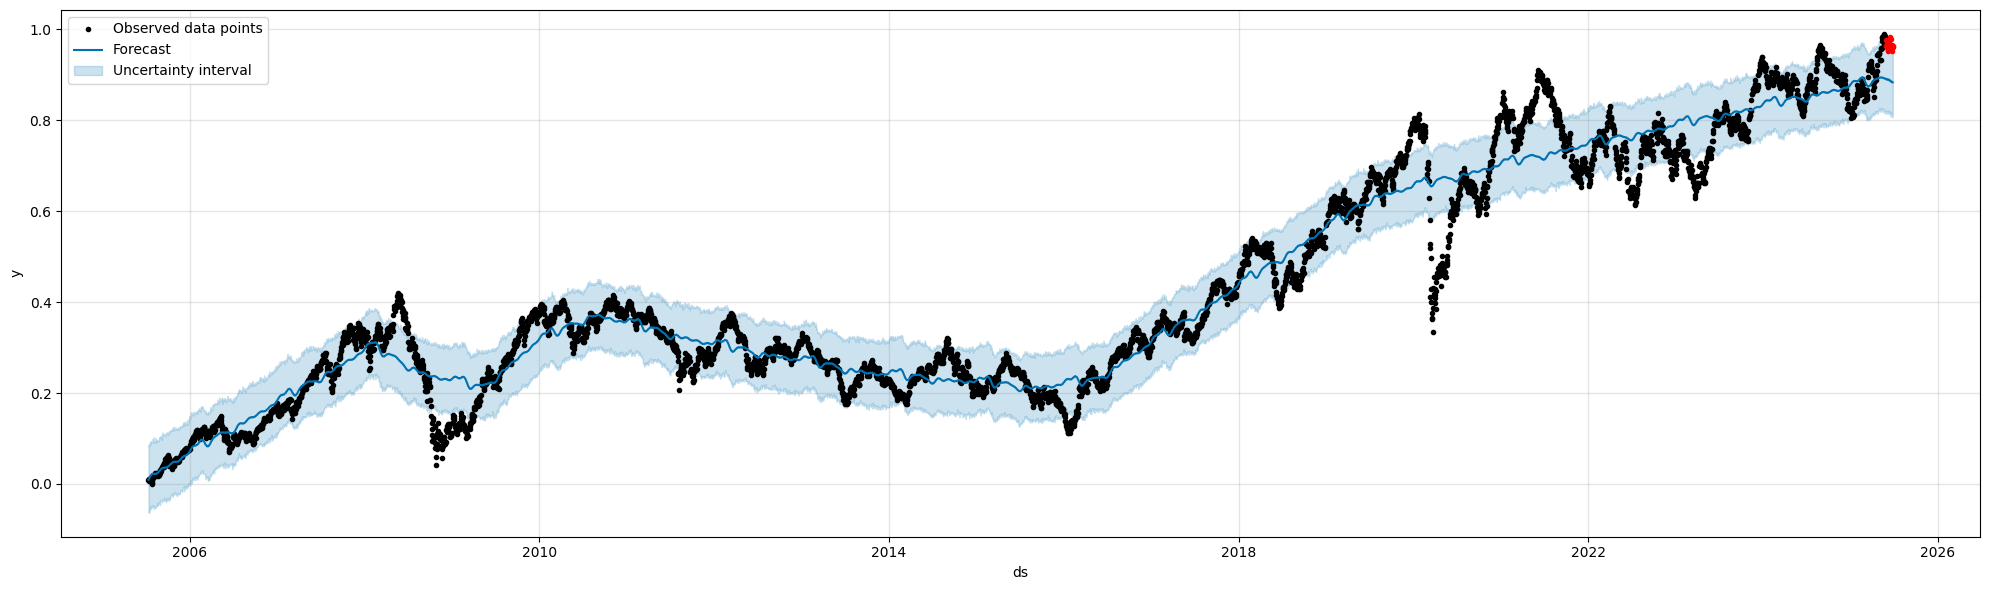

In [ ]:
#Plotando o resultado
modelo.plot(previsao, figsize=(20,6));
plt.plot(teste['ds'], teste['y'], '.r')
plt.legend()

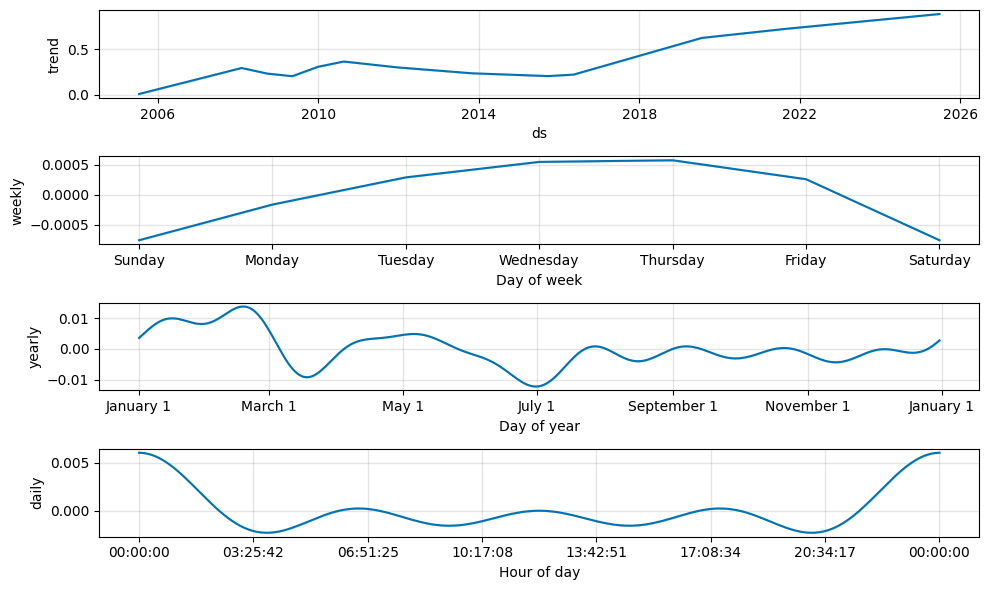

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

In [ ]:
from prophet.plot import add_changepoints_to_plot

modelo_changepoints = Prophet(n_changepoints=5)
modelo_changepoints.fit(treino)
dataFramefuture = modelo_changepoints.make_future_dataframe(periods=30, freq='D')
previsao_changepoints = modelo_changepoints.predict(dataFramefuture)
previsao_changepoints.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s9x8k7_/3krg_wlh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s9x8k7_/s25sqpnx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90858', 'data', 'file=/tmp/tmp9s9x8k7_/3krg_wlh.json', 'init=/tmp/tmp9s9x8k7_/s25sqpnx.json', 'output', 'file=/tmp/tmp9s9x8k7_/prophet_modelsezgrnqi/prophet_model-20250802222442.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:24:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:24:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-07-12,0.053145,-0.037012,0.143046,0.053145,0.053145,0.000276,0.000276,0.000276,0.008574,0.008574,0.008574,-0.008298,-0.008298,-0.008298,0.0,0.0,0.0,0.053421
1,2005-07-13,0.053333,-0.029302,0.144980,0.053333,0.053333,0.001840,0.001840,0.001840,0.009445,0.009445,0.009445,-0.007605,-0.007605,-0.007605,0.0,0.0,0.0,0.055173
2,2005-07-14,0.053521,-0.031542,0.148492,0.053521,0.053521,0.002435,0.002435,0.002435,0.009335,0.009335,0.009335,-0.006900,-0.006900,-0.006900,0.0,0.0,0.0,0.055956
3,2005-07-15,0.053709,-0.035120,0.146485,0.053709,0.053709,0.002621,0.002621,0.002621,0.008814,0.008814,0.008814,-0.006194,-0.006194,-0.006194,0.0,0.0,0.0,0.056330
4,2005-07-18,0.054274,-0.028794,0.139377,0.054274,0.054274,0.004254,0.004254,0.004254,0.008431,0.008431,0.008431,-0.004177,-0.004177,-0.004177,0.0,0.0,0.0,0.058527


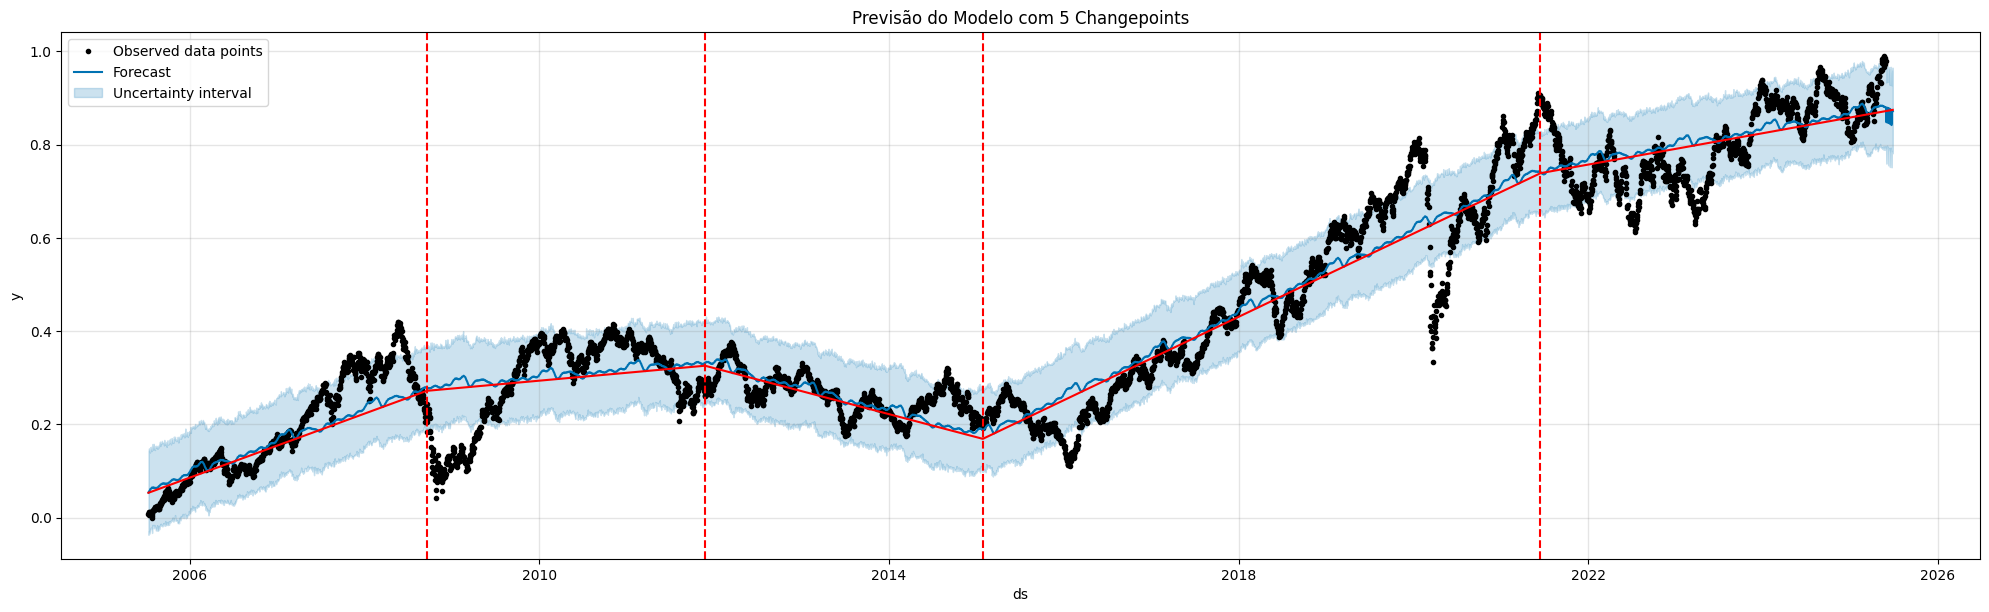

In [ ]:
fig = modelo_changepoints.plot(previsao_changepoints, figsize=(20,6));
a = add_changepoints_to_plot(fig.gca(), modelo_changepoints, previsao_changepoints)
plt.title("Previsão do Modelo com 5 Changepoints")
plt.legend()
plt.show()

In [ ]:
#Extrair as colunas relevantes dos DataFrames
previsao_cols = ['ds', 'yhat']
valores_reais_cols = ['ds', 'y']

In [ ]:
# Extrair as colunas relevantes dos DataFrames
previsao_cols = ['ds', 'yhat']
valores_reais_cols = ['ds', 'y']

previsao = previsao[previsao_cols]
valores_reais = treino.reset_index()[valores_reais_cols]

# Mesclar os DataFrames nas colunas 'ds' para comparar previsões e valores reais
resultados = pd.merge(previsao, valores_reais, on='ds', how='inner')

# Calcular o erro percentual absoluto para cada ponto de dados
resultados['erro_percentual_absoluto'] = np.abs((resultados['y'] - resultados['yhat']) / resultados['y'])

In [ ]:
resultados

,ds,yhat,y,erro_percentual_absoluto
0,2005-07-12,0.009257,0.008609,0.075194
1,2005-07-13,0.010589,0.011351,0.067129
2,2005-07-14,0.011699,0.011899,0.016815
3,2005-07-15,0.012463,0.005919,1.105459
4,2005-07-18,0.015146,0.006768,1.238086
...,...,...,...,...
4918,2025-05-22,0.892805,0.965811,0.075590
4919,2025-05-23,0.892270,0.970531,0.080638
4920,2025-05-26,0.891248,0.973204,0.084212
4921,2025-05-27,0.891526,0.985240,0.095118


In [ ]:
resultados.tail()

,ds,yhat,y,erro_percentual_absoluto
4918,2025-05-22,0.892805,0.965811,0.075590
4919,2025-05-23,0.892270,0.970531,0.080638
4920,2025-05-26,0.891248,0.973204,0.084212
4921,2025-05-27,0.891526,0.985240,0.095118
4922,2025-05-28,0.891623,0.979646,0.089851


In [ ]:
# Mesclar os dados de teste com as previsões do modelo original
resultados_teste = pd.merge(teste, previsao, on='ds', how='inner')

# Calcular o erro percentual absoluto para os dados de teste
resultados_teste['erro_percentual_absoluto'] = np.abs((resultados_teste['y'] - resultados_teste['yhat']) / resultados_teste['y']) * 100

# Exibir as primeiras linhas do dataframe de resultados para os dados de teste
display(resultados_teste.head())

,ds,y,yhat,erro_percentual_absoluto
0,2025-05-29,0.976613,0.891504,8.714769
1,2025-05-30,0.963703,0.891054,7.538621
2,2025-06-02,0.961648,0.890275,7.421911
3,2025-06-03,0.968150,0.890613,8.008761
4,2025-06-04,0.963489,0.890752,7.549345


In [ ]:
resultados_teste.head(30)

,ds,y,yhat,erro_percentual_absoluto
0,2025-05-29,0.976613,0.891504,8.714769
1,2025-05-30,0.963703,0.891054,7.538621
2,2025-06-02,0.961648,0.890275,7.421911
3,2025-06-03,0.968150,0.890613,8.008761
4,2025-06-04,0.963489,0.890752,7.549345
5,2025-06-05,0.956927,0.890653,6.925722
6,2025-06-06,0.955779,0.890199,6.861414
7,2025-06-09,0.952327,0.889250,6.623492
8,2025-06-10,0.958641,0.889478,7.214696
9,2025-06-11,0.964569,0.889483,7.784336


In [ ]:
resultados_teste['diferenca'] = resultados_teste['y'] - resultados_teste['yhat']
display(resultados_teste)

,ds,y,yhat,erro_percentual_absoluto,diferenca
0,2025-05-29,0.976613,0.891504,8.714769,0.085110
1,2025-05-30,0.963703,0.891054,7.538621,0.072650
2,2025-06-02,0.961648,0.890275,7.421911,0.071373
3,2025-06-03,0.968150,0.890613,8.008761,0.077537
4,2025-06-04,0.963489,0.890752,7.549345,0.072737
5,2025-06-05,0.956927,0.890653,6.925722,0.066274
6,2025-06-06,0.955779,0.890199,6.861414,0.065580
7,2025-06-09,0.952327,0.889250,6.623492,0.063077
8,2025-06-10,0.958641,0.889478,7.214696,0.069163
9,2025-06-11,0.964569,0.889483,7.784336,0.075085


In [ ]:
resultados_teste['percentual_acerto'] = 100 - resultados_teste['erro_percentual_absoluto']
display(resultados_teste.head(30))

media_acerto = resultados_teste['percentual_acerto'].mean()
print(f"\nPercentual de acerto médio: {media_acerto:.2f}%")

,ds,y,yhat,erro_percentual_absoluto,diferenca,percentual_acerto
0,2025-05-29,0.976613,0.891504,8.714769,0.085110,91.285231
1,2025-05-30,0.963703,0.891054,7.538621,0.072650,92.461379
2,2025-06-02,0.961648,0.890275,7.421911,0.071373,92.578089
3,2025-06-03,0.968150,0.890613,8.008761,0.077537,91.991239
4,2025-06-04,0.963489,0.890752,7.549345,0.072737,92.450655
5,2025-06-05,0.956927,0.890653,6.925722,0.066274,93.074278
6,2025-06-06,0.955779,0.890199,6.861414,0.065580,93.138586
7,2025-06-09,0.952327,0.889250,6.623492,0.063077,93.376508
8,2025-06-10,0.958641,0.889478,7.214696,0.069163,92.785304
9,2025-06-11,0.964569,0.889483,7.784336,0.075085,92.215664



Percentual de acerto médio: 92.03%


In [ ]:
#Calcular o MAPE
mape = np.mean(resultados_teste['erro_percentual_absoluto'])
print(f"MAPE: {mape:.2f}%")

MAPE: 7.97%


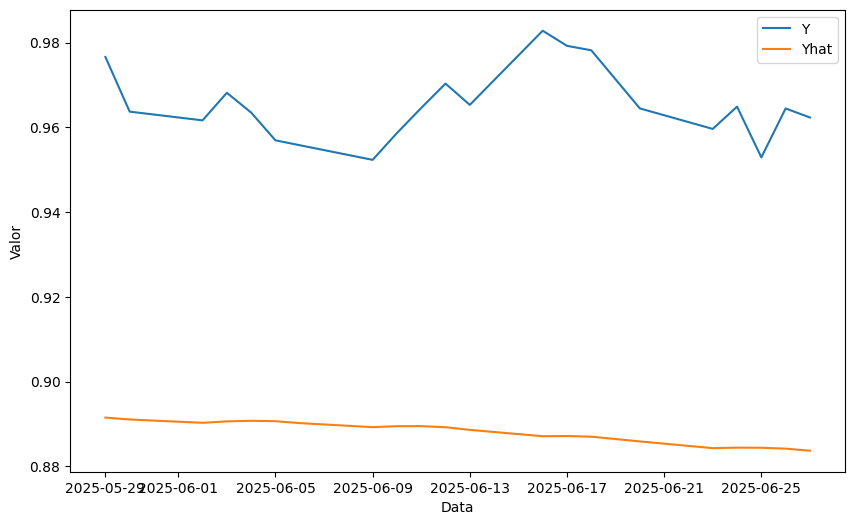

In [ ]:
# Plotar os valores de Y e Yhat, informando na legenda a média do percentual de acertos nos ultimos 30 dias
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(resultados_teste['ds'][-30:], resultados_teste['y'][-30:], label='Y')
ax.plot(resultados_teste['ds'][-30:], resultados_teste['yhat'][-30:], label='Yhat')
ax.set_xlabel('Data')
ax.set_ylabel('Valor')
ax.legend()

In [ ]:
resultados_teste['y_diff'] = resultados_teste['y'].diff()
resultados_teste['yhat_diff'] = resultados_teste['yhat'].diff()
display(resultados_teste.head(30))

,ds,y,yhat,erro_percentual_absoluto,diferenca,percentual_acerto,y_diff,yhat_diff
0,2025-05-29,0.976613,0.891504,8.714769,0.085110,91.285231,NaN,NaN
1,2025-05-30,0.963703,0.891054,7.538621,0.072650,92.461379,-0.012910,-0.000450
2,2025-06-02,0.961648,0.890275,7.421911,0.071373,92.578089,-0.002056,-0.000779
3,2025-06-03,0.968150,0.890613,8.008761,0.077537,91.991239,0.006502,0.000338
4,2025-06-04,0.963489,0.890752,7.549345,0.072737,92.450655,-0.004660,0.000139
5,2025-06-05,0.956927,0.890653,6.925722,0.066274,93.074278,-0.006562,-0.000099
6,2025-06-06,0.955779,0.890199,6.861414,0.065580,93.138586,-0.001148,-0.000454
7,2025-06-09,0.952327,0.889250,6.623492,0.063077,93.376508,-0.003452,-0.000950
8,2025-06-10,0.958641,0.889478,7.214696,0.069163,92.785304,0.006314,0.000228
9,2025-06-11,0.964569,0.889483,7.784336,0.075085,92.215664,0.005928,0.000006


In [ ]:
resultados_teste['y_class'] = (resultados_teste['y_diff'] > 0).astype(int)
resultados_teste['yhat_class'] = (resultados_teste['yhat_diff'] > 0).astype(int)
display(resultados_teste.head(30))

,ds,y,yhat,erro_percentual_absoluto,diferenca,percentual_acerto,y_diff,yhat_diff,y_class,yhat_class
0,2025-05-29,0.976613,0.891504,8.714769,0.085110,91.285231,NaN,NaN,0,0
1,2025-05-30,0.963703,0.891054,7.538621,0.072650,92.461379,-0.012910,-0.000450,0,0
2,2025-06-02,0.961648,0.890275,7.421911,0.071373,92.578089,-0.002056,-0.000779,0,0
3,2025-06-03,0.968150,0.890613,8.008761,0.077537,91.991239,0.006502,0.000338,1,1
4,2025-06-04,0.963489,0.890752,7.549345,0.072737,92.450655,-0.004660,0.000139,0,1
5,2025-06-05,0.956927,0.890653,6.925722,0.066274,93.074278,-0.006562,-0.000099,0,0
6,2025-06-06,0.955779,0.890199,6.861414,0.065580,93.138586,-0.001148,-0.000454,0,0
7,2025-06-09,0.952327,0.889250,6.623492,0.063077,93.376508,-0.003452,-0.000950,0,0
8,2025-06-10,0.958641,0.889478,7.214696,0.069163,92.785304,0.006314,0.000228,1,1
9,2025-06-11,0.964569,0.889483,7.784336,0.075085,92.215664,0.005928,0.000006,1,1


In [ ]:
from sklearn.metrics import accuracy_score

# Remover a primeira linha que contém valores NaN
resultados_teste_sem_nan = resultados_teste.dropna()

# Calcular a acurácia
acuracia = accuracy_score(resultados_teste_sem_nan['y_class'], resultados_teste_sem_nan['yhat_class'])

print(f"Acurácia do modelo na previsão de direção: {acuracia:.2%}")

Acurácia do modelo na previsão de direção: 75.00%


In [ ]:
from sklearn.metrics import classification_report

# Gerar o relatório de classificação
report = classification_report(resultados_teste_sem_nan['y_class'], resultados_teste_sem_nan['yhat_class'])

print(report)

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.73      0.71      0.72        20
weighted avg       0.74      0.75      0.75        20



              precision    recall  f1-score  support
0              0.785714  0.846154  0.814815    13.00
1              0.666667  0.571429  0.615385     7.00
accuracy       0.750000  0.750000  0.750000     0.75
macro avg      0.726190  0.708791  0.715100    20.00
weighted avg   0.744048  0.750000  0.745014    20.00


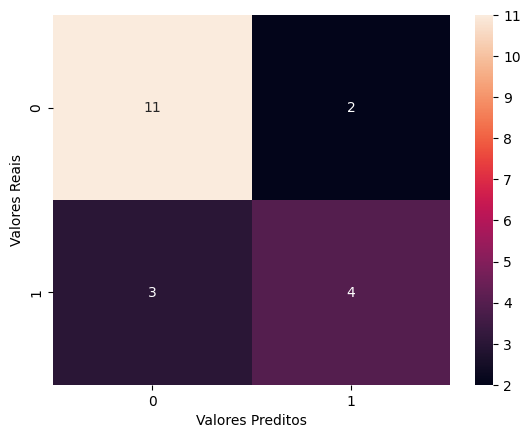

In [ ]:
#Criar a matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns
report = classification_report(resultados_teste_sem_nan['y_class'], resultados_teste_sem_nan['yhat_class'], output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report
print(df_classification_report)
#Fazer um plot da matriz de confusão
cm = confusion_matrix(resultados_teste_sem_nan['y_class'], resultados_teste_sem_nan['yhat_class'])
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()


## --- Observação - Não executei o código após a partir da linha 208

In [ ]:
# Ordenar o DataFrame pela data em ordem crescente
resultados_teste = resultados_teste.sort_values(by='ds').reset_index(drop=True)

# Recalcular a diferença com base na ordem cronológica correta
resultados_teste['y_diff'] = resultados_teste['y'].diff()
resultados_teste['yhat_diff'] = resultados_teste['yhat'].diff()

display(resultados_teste.head(30))

,ds,y,yhat,erro_percentual_absoluto,diferenca,percentual_acerto,y_diff,yhat_diff,y_class,yhat_class
0,2025-05-29,0.976613,0.891504,8.714769,0.085110,91.285231,NaN,NaN,0,0
1,2025-05-30,0.963703,0.891054,7.538621,0.072650,92.461379,-0.012910,-0.000450,0,0
2,2025-06-02,0.961648,0.890275,7.421911,0.071373,92.578089,-0.002056,-0.000779,0,0
3,2025-06-03,0.968150,0.890613,8.008761,0.077537,91.991239,0.006502,0.000338,1,1
4,2025-06-04,0.963489,0.890752,7.549345,0.072737,92.450655,-0.004660,0.000139,0,1
5,2025-06-05,0.956927,0.890653,6.925722,0.066274,93.074278,-0.006562,-0.000099,0,0
6,2025-06-06,0.955779,0.890199,6.861414,0.065580,93.138586,-0.001148,-0.000454,0,0
7,2025-06-09,0.952327,0.889250,6.623492,0.063077,93.376508,-0.003452,-0.000950,0,0
8,2025-06-10,0.958641,0.889478,7.214696,0.069163,92.785304,0.006314,0.000228,1,1
9,2025-06-11,0.964569,0.889483,7.784336,0.075085,92.215664,0.005928,0.000006,1,1


In [ ]:
# Recalcular a variação percentual diária com base nos valores corrigidos
resultados_teste['y_pct_change'] = (resultados_teste['y_diff'] / resultados_teste['y'].shift(1)) * 100
resultados_teste['yhat_pct_change'] = (resultados_teste['yhat_diff'] / resultados_teste['yhat'].shift(1)) * 100

# Criar a nova classificação com o limiar de 0.5%
limiar_percentual = 0.5
resultados_teste['y_class_new'] = (resultados_teste['y_pct_change'] > limiar_percentual).astype(int)
resultados_teste['yhat_class_new'] = (resultados_teste['yhat_pct_change'] > limiar_percentual).astype(int)

display(resultados_teste.head(30))

,ds,y,yhat,erro_percentual_absoluto,diferenca,percentual_acerto,y_diff,yhat_diff,y_class,yhat_class,y_pct_change,yhat_pct_change,y_class_new,yhat_class_new
0,2025-05-29,0.976613,0.891504,8.714769,0.085110,91.285231,NaN,NaN,0,0,NaN,NaN,0,0
1,2025-05-30,0.963703,0.891054,7.538621,0.072650,92.461379,-0.012910,-0.000450,0,0,-1.321895,-0.050495,0,0
2,2025-06-02,0.961648,0.890275,7.421911,0.071373,92.578089,-0.002056,-0.000779,0,0,-0.213341,-0.087384,0,0
3,2025-06-03,0.968150,0.890613,8.008761,0.077537,91.991239,0.006502,0.000338,1,1,0.676133,0.037950,1,0
4,2025-06-04,0.963489,0.890752,7.549345,0.072737,92.450655,-0.004660,0.000139,0,1,-0.481352,0.015657,0,0
5,2025-06-05,0.956927,0.890653,6.925722,0.066274,93.074278,-0.006562,-0.000099,0,0,-0.681064,-0.011111,0,0
6,2025-06-06,0.955779,0.890199,6.861414,0.065580,93.138586,-0.001148,-0.000454,0,0,-0.119959,-0.050949,0,0
7,2025-06-09,0.952327,0.889250,6.623492,0.063077,93.376508,-0.003452,-0.000950,0,0,-0.361205,-0.106678,0,0
8,2025-06-10,0.958641,0.889478,7.214696,0.069163,92.785304,0.006314,0.000228,1,1,0.662961,0.025623,1,0
9,2025-06-11,0.964569,0.889483,7.784336,0.075085,92.215664,0.005928,0.000006,1,1,0.618382,0.000652,1,0


In [ ]:
from sklearn.metrics import accuracy_score

# Remover as linhas que contêm valores NaN
resultados_teste_sem_nan_new = resultados_teste.dropna()

# Calcular a acurácia da nova classificação
acuracia_new = accuracy_score(resultados_teste_sem_nan_new['y_class_new'], resultados_teste_sem_nan_new['yhat_class_new'])

print(f"Acurácia do modelo com limiar de 0.5% (corrigido): {acuracia_new:.2%}")

Acurácia do modelo com limiar de 0.5% (corrigido): 65.00%


In [ ]:
from sklearn.metrics import classification_report

# Gerar o relatório de classificação para a nova classe com dados corrigidos
report_new_corrected = classification_report(resultados_teste_sem_nan_new['y_class_new'], resultados_teste_sem_nan_new['yhat_class_new'])

print(report_new_corrected)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.00      0.00      0.00         7

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Recalcular a classificação direcional com base nos dados corrigidos
resultados_teste['y_class'] = (resultados_teste['y_diff'] > 0).astype(int)
resultados_teste['yhat_class'] = (resultados_teste['yhat_diff'] > 0).astype(int)

# Remover as linhas que contêm valores NaN
resultados_teste_sem_nan_class = resultados_teste.dropna()

# Calcular a acurácia da classificação direcional
acuracia_class = accuracy_score(resultados_teste_sem_nan_class['y_class'], resultados_teste_sem_nan_class['yhat_class'])
print(f"Acurácia da classificação direcional (corrigido): {acuracia_class:.2%}\n")

# Gerar o relatório de classificação direcional
report_class = classification_report(resultados_teste_sem_nan_class['y_class'], resultados_teste_sem_nan_class['yhat_class'])
print(report_class)

Acurácia da classificação direcional (corrigido): 75.00%

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.73      0.71      0.72        20
weighted avg       0.74      0.75      0.75        20



DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s9x8k7_/wlvn1y0p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s9x8k7_/wolg1n6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71292', 'data', 'file=/tmp/tmp9s9x8k7_/wlvn1y0p.json', 'init=/tmp/tmp9s9x8k7_/wolg1n6t.json', 'output', 'file=/tmp/tmp9s9x8k7_/prophet_modelcsi0dr20/prophet_model-20250802223527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:35:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:35:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


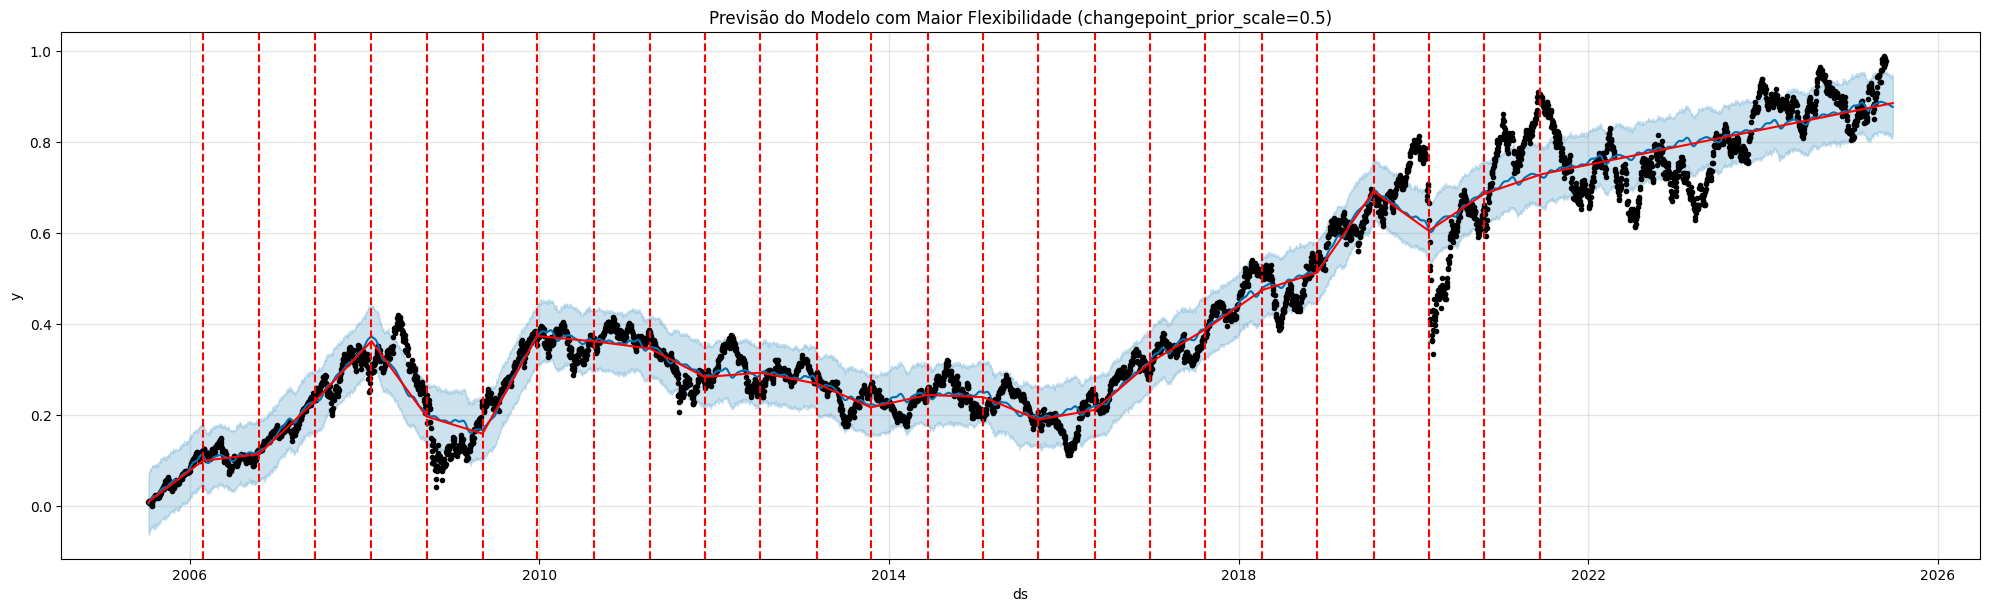

In [ ]:
from prophet.plot import add_changepoints_to_plot

# Criar um novo modelo com maior sensibilidade
modelo_flexivel = Prophet(changepoint_prior_scale=0.5, daily_seasonality=True)

# Treinar o novo modelo
modelo_flexivel.fit(treino)

# Fazer a previsão com o novo modelo
df_futuro_flexivel = modelo_flexivel.make_future_dataframe(periods=30, freq='D')
previsao_flexivel = modelo_flexivel.predict(df_futuro_flexivel)

# Plotar o gráfico do novo modelo
fig = modelo_flexivel.plot(previsao_flexivel, figsize=(20,6))
a = add_changepoints_to_plot(fig.gca(), modelo_flexivel, previsao_flexivel)
plt.title("Previsão do Modelo com Maior Flexibilidade (changepoint_prior_scale=0.5)")
plt.show()

In [ ]:
# 1. Mesclar os dados de teste com as previsões do modelo flexível
resultados_teste_flexivel = pd.merge(teste, previsao_flexivel, on='ds', how='inner')

# 2. Ordenar o DataFrame pela data em ordem crescente
resultados_teste_flexivel = resultados_teste_flexivel.sort_values(by='ds').reset_index(drop=True)

# 3. Recalcular a diferença com base na ordem cronológica correta
resultados_teste_flexivel['y_diff'] = resultados_teste_flexivel['y'].diff()
resultados_teste_flexivel['yhat_diff'] = resultados_teste_flexivel['yhat'].diff()

# 4. Recalcular a classificação direcional
resultados_teste_flexivel['y_class'] = (resultados_teste_flexivel['y_diff'] > 0).astype(int)
resultados_teste_flexivel['yhat_class'] = (resultados_teste_flexivel['yhat_diff'] > 0).astype(int)

# 5. Remover as linhas que contêm valores NaN
resultados_teste_flexivel_sem_nan = resultados_teste_flexivel.dropna()

# 6. Calcular a acurácia da nova classificação direcional
acuracia_flexivel = accuracy_score(resultados_teste_flexivel_sem_nan['y_class'], resultados_teste_flexivel_sem_nan['yhat_class'])
print(f"Acurácia do Modelo Flexível (corrigido): {acuracia_flexivel:.2%}\n")

# 7. Gerar o relatório de classificação direcional
report_flexivel = classification_report(resultados_teste_flexivel_sem_nan['y_class'], resultados_teste_flexivel_sem_nan['yhat_class'])
print("Relatório de Classificação do Modelo Flexível:")
print(report_flexivel)

Acurácia do Modelo Flexível (corrigido): 80.00%

Relatório de Classificação do Modelo Flexível:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.43      0.60         7

    accuracy                           0.80        20
   macro avg       0.88      0.71      0.73        20
weighted avg       0.85      0.80      0.77        20



DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s9x8k7_/ohk5qxtk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s9x8k7_/m9ijtrx8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43711', 'data', 'file=/tmp/tmp9s9x8k7_/ohk5qxtk.json', 'init=/tmp/tmp9s9x8k7_/m9ijtrx8.json', 'output', 'file=/tmp/tmp9s9x8k7_/prophet_model_4qhsmqy/prophet_model-20250802223606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:36:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:36:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


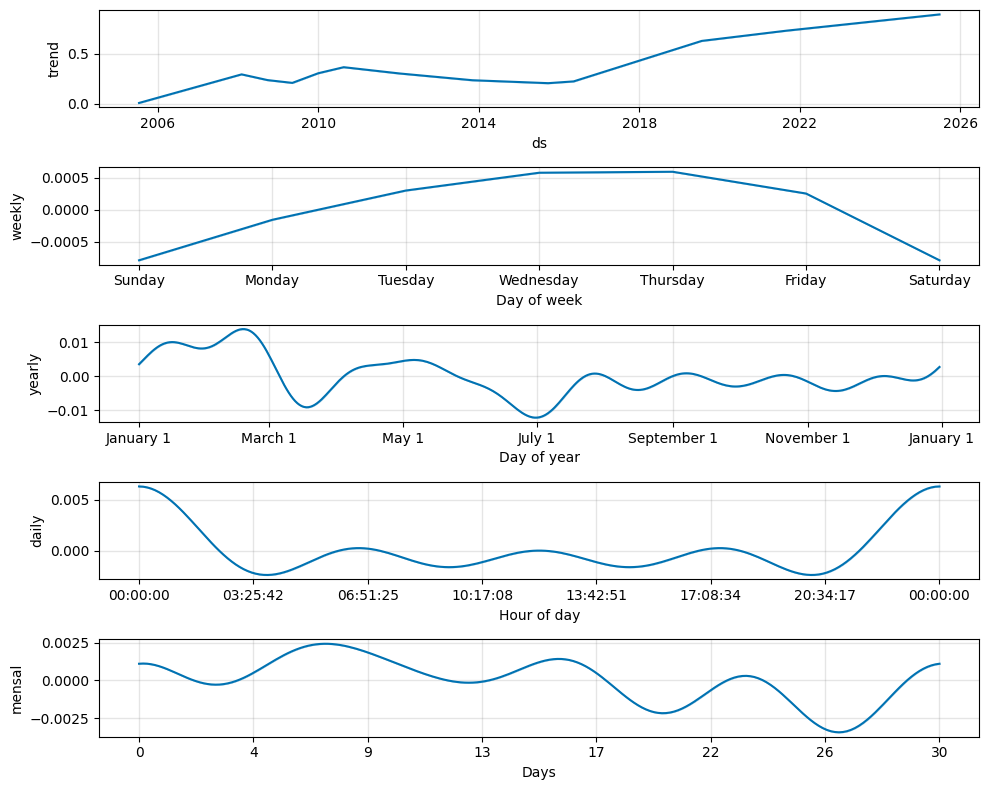

In [ ]:
# Criar um novo modelo com sazonalidade mensal
modelo_mensal = Prophet(daily_seasonality=True)
modelo_mensal.add_seasonality(name='mensal', period=30.5, fourier_order=5)

# Treinar o novo modelo
modelo_mensal.fit(treino)

# Fazer a previsão com o novo modelo
df_futuro_mensal = modelo_mensal.make_future_dataframe(periods=30, freq='D')
previsao_mensal = modelo_mensal.predict(df_futuro_mensal)

# Plotar os componentes do novo modelo
fig = modelo_mensal.plot_components(previsao_mensal, figsize=(10,8))
plt.show()

In [ ]:
# 1. Mesclar os dados de teste com as previsões do modelo com sazonalidade mensal
resultados_teste_mensal = pd.merge(teste, previsao_mensal, on='ds', how='inner')

# 2. Ordenar o DataFrame pela data em ordem crescente
resultados_teste_mensal = resultados_teste_mensal.sort_values(by='ds').reset_index(drop=True)

# 3. Recalcular a diferença com base na ordem cronológica correta
resultados_teste_mensal['y_diff'] = resultados_teste_mensal['y'].diff()
resultados_teste_mensal['yhat_diff'] = resultados_teste_mensal['yhat'].diff()

# 4. Recalcular a classificação direcional
resultados_teste_mensal['y_class'] = (resultados_teste_mensal['y_diff'] > 0).astype(int)
resultados_teste_mensal['yhat_class'] = (resultados_teste_mensal['yhat_diff'] > 0).astype(int)

# 5. Remover as linhas que contêm valores NaN
resultados_teste_mensal_sem_nan = resultados_teste_mensal.dropna()

# 6. Calcular a acurácia da nova classificação direcional
acuracia_mensal = accuracy_score(resultados_teste_mensal_sem_nan['y_class'], resultados_teste_mensal_sem_nan['yhat_class'])
print(f"Acurácia do Modelo com Sazonalidade Mensal (corrigido): {acuracia_mensal:.2%}\n")

# 7. Gerar o relatório de classificação direcional
report_mensal = classification_report(resultados_teste_mensal_sem_nan['y_class'], resultados_teste_mensal_sem_nan['yhat_class'])
print("Relatório de Classificação do Modelo com Sazonalidade Mensal:")
print(report_mensal)

Acurácia do Modelo com Sazonalidade Mensal (corrigido): 50.00%

Relatório de Classificação do Modelo com Sazonalidade Mensal:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.29      0.29      0.29         7

    accuracy                           0.50        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.50      0.50      0.50        20



In [ ]:
# Criar um novo modelo com feriados brasileiros
modelo_feriados = Prophet(daily_seasonality=True)
modelo_feriados.add_country_holidays(country_name='BR')

# Treinar o novo modelo
modelo_feriados.fit(treino)

# Fazer a previsão com o novo modelo
df_futuro_feriados = modelo_feriados.make_future_dataframe(periods=30, freq='D')
previsao_feriados = modelo_feriados.predict(df_futuro_feriados)

# Avaliar o modelo com feriados
# 1. Mesclar os dados de teste com as previsões
resultados_teste_feriados = pd.merge(teste, previsao_feriados, on='ds', how='inner')

# 2. Ordenar o DataFrame pela data em ordem crescente
resultados_teste_feriados = resultados_teste_feriados.sort_values(by='ds').reset_index(drop=True)

# 3. Recalcular a diferença com base na ordem cronológica correta
resultados_teste_feriados['y_diff'] = resultados_teste_feriados['y'].diff()
resultados_teste_feriados['yhat_diff'] = resultados_teste_feriados['yhat'].diff()

# 4. Recalcular a classificação direcional
resultados_teste_feriados['y_class'] = (resultados_teste_feriados['y_diff'] > 0).astype(int)
resultados_teste_feriados['yhat_class'] = (resultados_teste_feriados['yhat_diff'] > 0).astype(int)

# 5. Remover as linhas que contêm valores NaN
resultados_teste_feriados_sem_nan = resultados_teste_feriados.dropna()

# 6. Calcular a acurácia da nova classificação direcional
acuracia_feriados = accuracy_score(resultados_teste_feriados_sem_nan['y_class'], resultados_teste_feriados_sem_nan['yhat_class'])
print(f"Acurácia do Modelo com Feriados (corrigido): {acuracia_feriados:.2%}\n")

# 7. Gerar o relatório de classificação direcional
report_feriados = classification_report(resultados_teste_feriados_sem_nan['y_class'], resultados_teste_feriados_sem_nan['yhat_class'])
print("Relatório de Classificação do Modelo com Feriados:")
print(report_feriados)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s9x8k7_/sj96e1vp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s9x8k7_/p3k63ni9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25999', 'data', 'file=/tmp/tmp9s9x8k7_/sj96e1vp.json', 'init=/tmp/tmp9s9x8k7_/p3k63ni9.json', 'output', 'file=/tmp/tmp9s9x8k7_/prophet_modelstxi196e/prophet_model-20250802223637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:36:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:36:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Acurácia do Modelo com Feriados (corrigido): 75.00%

Relatório de Classificação do Modelo com Feriados:
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.73      0.71      0.72        20
weighted avg       0.74      0.75      0.75        20

